In [1]:
from annotator import Annotator
from graph_edit_distance import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

tyler = Annotator('tyler', "annotations-TBikaun.json")
daniel = Annotator('daniel', "annotations-danielsantosa.json")
caitlin = Annotator('caitlin', "annotations-caitlinwoods.json")
ziyu = Annotator('ziyu', "annotations-ziyu.zhao.json")
michael = Annotator('michael', "annotations-mstewartuwa.json")
tim = Annotator('tim', "annotations-Tim.json")
melinda = Annotator('melinda', "annotations-mhodki.json")
label = Label_Metrics(ziyu, tyler, caitlin, tim)

In [2]:
overall_table = label.get_accumulated_table()

annotator_id                              caitlin                         tim  \
token                                                                           
head                                         None                        None   
head proximity switch                        Item                        None   
proximity switch                             None                        None   
repair                                   Activity                    Activity   
replace                                  Activity                    Activity   
240v                                    Specifier                   Specifier   
circuit                                      Item                        Item   
damaged                Observation/Observed_state  Observation/Observed_state   
inverter                                     Item                        Item   
has no output.         Observation/Observed_state  Observation/Observed_state   
inverter                    

In [3]:
percentage_same = 0.2
result_df = label.create_df_same_different(percentage_same, overall_table)

Creating a DataFrame with 21 rows with same labels and 10 rows with different labels
annotator_id                              caitlin                         tim  \
token                                                                           
head                                    Specifier                   Specifier   
head proximity switch                        Item                        Item   
proximity switch                             Item                        Item   
repair                                   Activity                    Activity   
replace                                  Activity                    Activity   
240v                                    Specifier                   Specifier   
circuit                                      Item                        Item   
damaged                Observation/Observed_state  Observation/Observed_state   
inverter                                     Item                        Item   
has no output.         O

In [4]:
pd.set_option('display.max_rows', None)
pivoted_table = label.pivot_to_long_format_graph_edit(result_df)

In [5]:
annotator_nodes = set(pivoted_table['annotator_id'])
annotator_graphs = Label_Metrics.create_annotator_graphs(pivoted_table, annotator_nodes)
pairwise_ged = Label_Metrics.calculate_pairwise_ged(annotator_graphs, annotator_nodes)
print("Graph Edit Distance between annotators:")
print(pairwise_ged)

Graph Edit Distance between annotators:
{('ziyu', 'tyler'): 14.0, ('ziyu', 'caitlin'): 14.0, ('ziyu', 'tim'): 16.0, ('tyler', 'caitlin'): 12.0, ('tyler', 'tim'): 6.0, ('caitlin', 'tim'): 10.0}


In [6]:
pairwise_reliability = Label_Metrics.calculate_pairwise_reliability(pairwise_ged, annotator_graphs)
print("Pairwise Reliability:")
print(pairwise_reliability)

overall_reliability = Label_Metrics.calculate_overall_reliability(pairwise_reliability)


Pairwise Reliability:
{('ziyu', 'tyler'): 0.7543859649122807, ('ziyu', 'caitlin'): 0.7543859649122807, ('ziyu', 'tim'): 0.7192982456140351, ('tyler', 'caitlin'): 0.7857142857142857, ('tyler', 'tim'): 0.8928571428571429, ('caitlin', 'tim'): 0.8214285714285714}


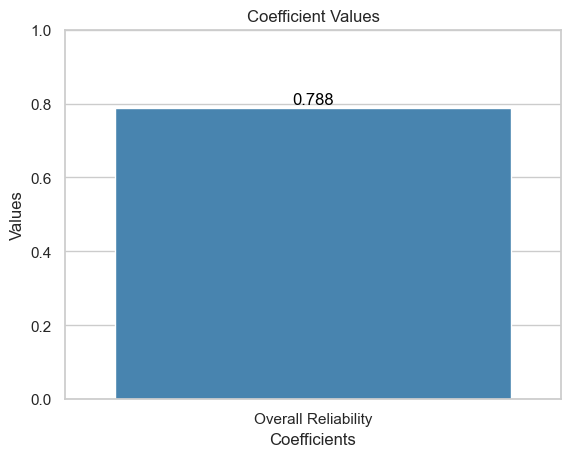

In [7]:
gr.create_bar_chart(overall_reliability, "Coefficients", "Values","Coefficient Values")